In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

## Datasets (splitting data)

In [2]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

Using version already downloaded: Wed Jul  1 11:12:18 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Wed Jul  1 11:12:21 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


In [3]:
#cleaning data, filling all nan email and subject with empty string
print(original_training_data.count())
for column in original_training_data:
    if column == "subject" or column == "email":
        original_training_data[column] = original_training_data[column].fillna("")

id         8348
subject    8342
email      8348
spam       8348
dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(original_training_data, test_size=0.1, random_state=42)

In [5]:
train

,id,subject,email,spam
7657,7657,Subject: Patch to enable/disable log\n,"while i was playing with the past issues, it a...",0
6911,6911,Subject: When an engineer flaps his wings\n,url: http://diveintomark.org/archives/2002/10/...,0
6074,6074,Subject: Re: [Razor-users] razor plugins for m...,"no, please post a link!\n \n fox\n ----- origi...",0
4376,4376,Subject: NYTimes.com Article: Stop Those Press...,this article from nytimes.com \n has been sent...,0
5766,5766,Subject: What's facing FBI's new CIO? (Tech Up...,<html>\n <head>\n <title>tech update today</ti...,0
...,...,...,...,...
5734,5734,Subject: [Spambayes] understanding high false ...,">>>>> ""tp"" == tim peters <tim.one@comcast.net>...",0
5191,5191,Subject: Reach millions on the internet!!\n,"\n dear consumers, increase your business sale...",1
5390,5390,Subject: Facts about sex.\n,\n forwarded-by: flower\n \n did you know that...,0
860,860,Subject: Re: Zoot apt/openssh & new DVD playin...,"on tue, oct 08, 2002 at 04:36:13pm +0200, matt...",0


In [6]:
test

,id,subject,email,spam
6475,6475,Subject: RE: My brain hurts\n,"> someone tell me a joke, or email me a beer o...",0
4559,4559,Subject: Re: [fwd: error exmh 2.5 07/13/2001 ]\n,--==_exmh_601800448p\n content-type: text/plai...,0
7977,7977,Subject: Re: [ILUG] How to copy some files\n,"on sun, jul 21, 2002 at 01:47:39am +0100, paul...",0
4350,4350,Subject: Re: OpenGL\n,"on thu, 1 aug 2002 17:10:48 +0100, john hinsle...",0
5593,5593,Subject: Re: req: Falcon's eye\n,"on tue, jul 30, 2002 at 12:17:21am +0300, vill...",0
...,...,...,...,...
6478,6478,"Subject: Erections O-plenty, Herbal Viagra\n","<html>\n <head>\n <meta http-equiv=""content...",1
8024,8024,Subject: RE: liberal defnitions\n,this situation wouldn't have happened in the f...,0
5001,5001,Subject: Re: [ILUG] packaging risks and the re...,"brendan kehoe wrote:\n > as a workaround, the ...",0
4742,4742,Subject: Holidays are coming?\n,help wanted. we are a 14 year old fortune 500...,1


## Cleaning Data and EDA

In [7]:
#array indicating if the words passed in exist in the text by splitting out 0 for no and 1 for yes
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = np.array([[1 if i in y else 0 for i in words ] for y in texts ])
    return indicator_array

### Pulling out each words in email and categorizing them by SPAM or HAM

In [8]:
from IPython.display import display, Markdown
df = pd.DataFrame({
    'word_1': [1, 0, 1, 0],
    'word_2': [0, 1, 0, 1],
    'type': ['spam', 'ham', 'ham', 'ham']
})
display(Markdown("> Our Original DataFrame has some words column and a type column. You can think of each row as a sentence, and the value of 1 or 0 indicates the number of occurances of the word in this sentence."))
display(df);
display(Markdown("> `melt` will turn columns into variale, notice how `word_1` and `word_2` become `variable`, their values are stored in the value column"))
display(df.melt("type"))

> Our Original DataFrame has some words column and a type column. You can think of each row as a sentence, and the value of 1 or 0 indicates the number of occurances of the word in this sentence.

,word_1,word_2,type
0,1,0,spam
1,0,1,ham
2,1,0,ham
3,0,1,ham


> `melt` will turn columns into variale, notice how `word_1` and `word_2` become `variable`, their values are stored in the value column

,type,variable,value
0,spam,word_1,1
1,ham,word_1,0
2,ham,word_1,1
3,ham,word_1,0
4,spam,word_2,0
5,ham,word_2,1
6,ham,word_2,0
7,ham,word_2,1


### Spam and Ham percentage for common word

,Words,Variable,Value
0,click,Ham,0.185523
1,=,Ham,0.311707
2,<head>,Ham,0.049866
3,fill,Ham,0.024486
4,offer,Ham,0.062198
5,click,Spam,0.549531
6,=,Spam,0.744526
7,<head>,Spam,0.354015
8,fill,Spam,0.173097
9,offer,Spam,0.314390


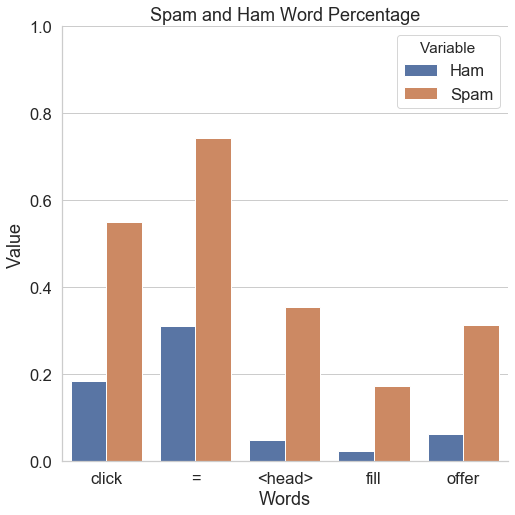

In [9]:
train=train.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts
chosen_words = ["click", "=", "<head>", "fill", "offer"]
# chosen_words = ['body', 'business', 'html', 'money', 'offer', 'please']
spam_emails = train[train['spam'] == 1]['email']
ham_emails = train[train['spam'] == 0]['email']
spam_percent = np.average(words_in_texts(chosen_words, spam_emails), axis = 0)
ham_percent = np.average(words_in_texts(chosen_words, ham_emails), axis = 0)
spam_ham = [spam_percent, ham_percent]
df = pd.DataFrame({
    'Words': chosen_words,
    'Ham': ham_percent, 
    'Spam': spam_percent,
})
fig, ax1 = plt.subplots(figsize=(8, 8))
tidy = df.melt('Words').rename(columns=str.title)
ax1.set(ylim=(0, 1))
plt.title("Spam and Ham Word Percentage")
sns.barplot(x='Words', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)


tidy

### Word Len Distribution

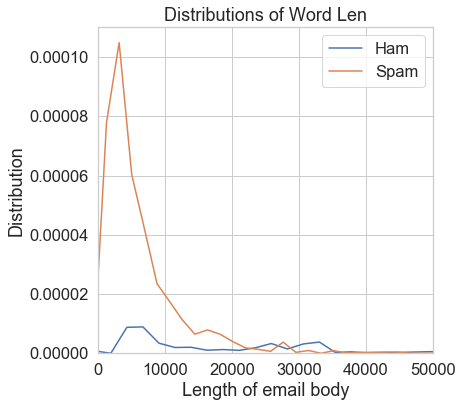

In [10]:
spam_len = [len(i) for i in train[train['spam'] == 1]['email']]
ham_len = [len(i) for i in train[train['spam'] == 0]['email']]
fig, ax2 = plt.subplots(figsize=(6, 6))
ax2.set(xlim=(0, 50000))
ax2.set(xlabel="Length of email body")
ax2.set(ylabel="Distribution")
plt.title("Distributions of Word Len")
sns.distplot(ham_len, hist=False, rug=False, label = 'Ham')
sns.distplot(spam_len, hist=False, rug=False, label = 'Spam')

In [11]:
test

,id,subject,email,spam
6475,6475,Subject: RE: My brain hurts\n,"> someone tell me a joke, or email me a beer o...",0
4559,4559,Subject: Re: [fwd: error exmh 2.5 07/13/2001 ]\n,--==_exmh_601800448p\n content-type: text/plai...,0
7977,7977,Subject: Re: [ILUG] How to copy some files\n,"on sun, jul 21, 2002 at 01:47:39am +0100, paul...",0
4350,4350,Subject: Re: OpenGL\n,"on thu, 1 aug 2002 17:10:48 +0100, john hinsle...",0
5593,5593,Subject: Re: req: Falcon's eye\n,"on tue, jul 30, 2002 at 12:17:21am +0300, vill...",0
...,...,...,...,...
6478,6478,"Subject: Erections O-plenty, Herbal Viagra\n","<html>\n <head>\n <meta http-equiv=""content...",1
8024,8024,Subject: RE: liberal defnitions\n,this situation wouldn't have happened in the f...,0
5001,5001,Subject: Re: [ILUG] packaging risks and the re...,"brendan kehoe wrote:\n > as a workaround, the ...",0
4742,4742,Subject: Holidays are coming?\n,help wanted. we are a 14 year old fortune 500...,1


In [12]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email'])
Y_train = train['spam'].values

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]),
 array([0, 0, 0, 0, 0]))

## Pre-classification and Feature Selection

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)


training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


In [14]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)
train

Using version already downloaded: Wed Jul  1 11:12:18 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Wed Jul  1 11:12:21 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


,id,subject,email,spam
7657,7657,Subject: Patch to enable/disable log\n,"while i was playing with the past issues, it a...",0
6911,6911,Subject: When an engineer flaps his wings\n,url: http://diveintomark.org/archives/2002/10/...,0
6074,6074,Subject: Re: [Razor-users] razor plugins for m...,"no, please post a link!\n \n fox\n ----- origi...",0
4376,4376,Subject: NYTimes.com Article: Stop Those Press...,this article from nytimes.com \n has been sent...,0
5766,5766,Subject: What's facing FBI's new CIO? (Tech Up...,<html>\n <head>\n <title>tech update today</ti...,0
...,...,...,...,...
5734,5734,Subject: [Spambayes] understanding high false ...,">>>>> ""tp"" == tim peters <tim.one@comcast.net>...",0
5191,5191,Subject: Reach millions on the internet!!\n,"\n dear consumers, increase your business sale...",1
5390,5390,Subject: Facts about sex.\n,\n forwarded-by: flower\n \n did you know that...,0
860,860,Subject: Re: Zoot apt/openssh & new DVD playin...,"on tue, oct 08, 2002 at 04:36:13pm +0200, matt...",0


In [15]:
test

,id,subject,email
0,0,Subject: CERT Advisory CA-2002-21 Vulnerabilit...,\n \n -----begin pgp signed message-----\n \n ...
1,1,Subject: ADV: Affordable Life Insurance ddbfk\n,low-cost term-life insurance!\n save up to 70%...
2,2,Subject: CAREER OPPORTUNITY. WORK FROM HOME\n,------=_nextpart_000_00a0_03e30a1a.b1804b54\n ...
3,3,Subject: Marriage makes both sexes happy\n,"url: http://www.newsisfree.com/click/-3,848315..."
4,4,Subject: Re: [SAtalk] SA very slow (hangs?) on...,on thursday 29 august 2002 16:39 cet mike burg...
...,...,...,...
995,995,Subject: Re: Alsa/Redhat 8 compatability\n,"once upon a time, brian wrote :\n \n > \n > ..."
996,996,Subject: Re: Goodbye Global Warming\n,\n --]> a green once said that if the spotted ...
997,997,Subject: Re: Entrepreneurs\n,"on fri, 23 aug 2002, robert harley wrote:\n \n..."
998,998,Subject: Re: [ILUG] slashdot EW Dijkstra humor\n,jpl suggested:\n > recursion is only truely u...


### Function for sorting words into 0 or 1 binary

In [16]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email']) 
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]),
 array([0, 0, 0, 0, 0]))

### Determining false negative and false positive

In [17]:
zero_predictor_fp = sum([1 if (np.zeros(len(X_train))[i] == 1 and Y_train[i] == 0) else 0 for i in np.arange(len(Y_train))])
zero_predictor_fn = sum([1 if (np.zeros(len(X_train))[i] == 0 and Y_train[i] == 1) else 0 for i in np.arange(len(Y_train))])

zero_predictor_fp, zero_predictor_fn

(0, 1918)

In [18]:
zero_predictor_tp = sum([1 if (np.zeros(len(X_train))[i] == 1 and Y_train[i] == 1) else 0 for i in np.arange(len(Y_train))])
zero_predictor_acc = (1/len(X_train)) * sum([1 if np.zeros(len(X_train))[y] == Y_train[y] else 0 
                                        for y in np.arange(len(X_train))])
zero_predictor_recall = zero_predictor_tp/ (zero_predictor_tp + zero_predictor_fn)

zero_predictor_acc, zero_predictor_recall

(0.7447091707706642, 0.0)

In [19]:
Y_train_hat = model.predict(X_train)
fp = sum([1 if (Y_train_hat[i] == 1 and Y_train[i] == 0) else 0 for i in np.arange(len(Y_train))])
fn = sum([1 if (Y_train_hat[i] == 0 and Y_train[i] == 1) else 0 for i in np.arange(len(Y_train))])
tp = sum([1 if (Y_train_hat[i] == 1 and Y_train[i] == 1) else 0 for i in np.arange(len(Y_train))])
tn = sum([1 if (Y_train_hat[i] == 0 and Y_train[i] == 0) else 0 for i in np.arange(len(Y_train))])
logistic_predictor_precision = tp / (tp+fp)
logistic_predictor_recall = tp / (tp+fn)
logistic_predictor_far = fp/(fp+tn)
fp,fn,tp,tn, logistic_predictor_precision, logistic_predictor_recall,logistic_predictor_far

(122,
 1699,
 219,
 5473,
 0.6422287390029325,
 0.11418143899895725,
 0.021805183199285077)

### Determine strongest correlation between features

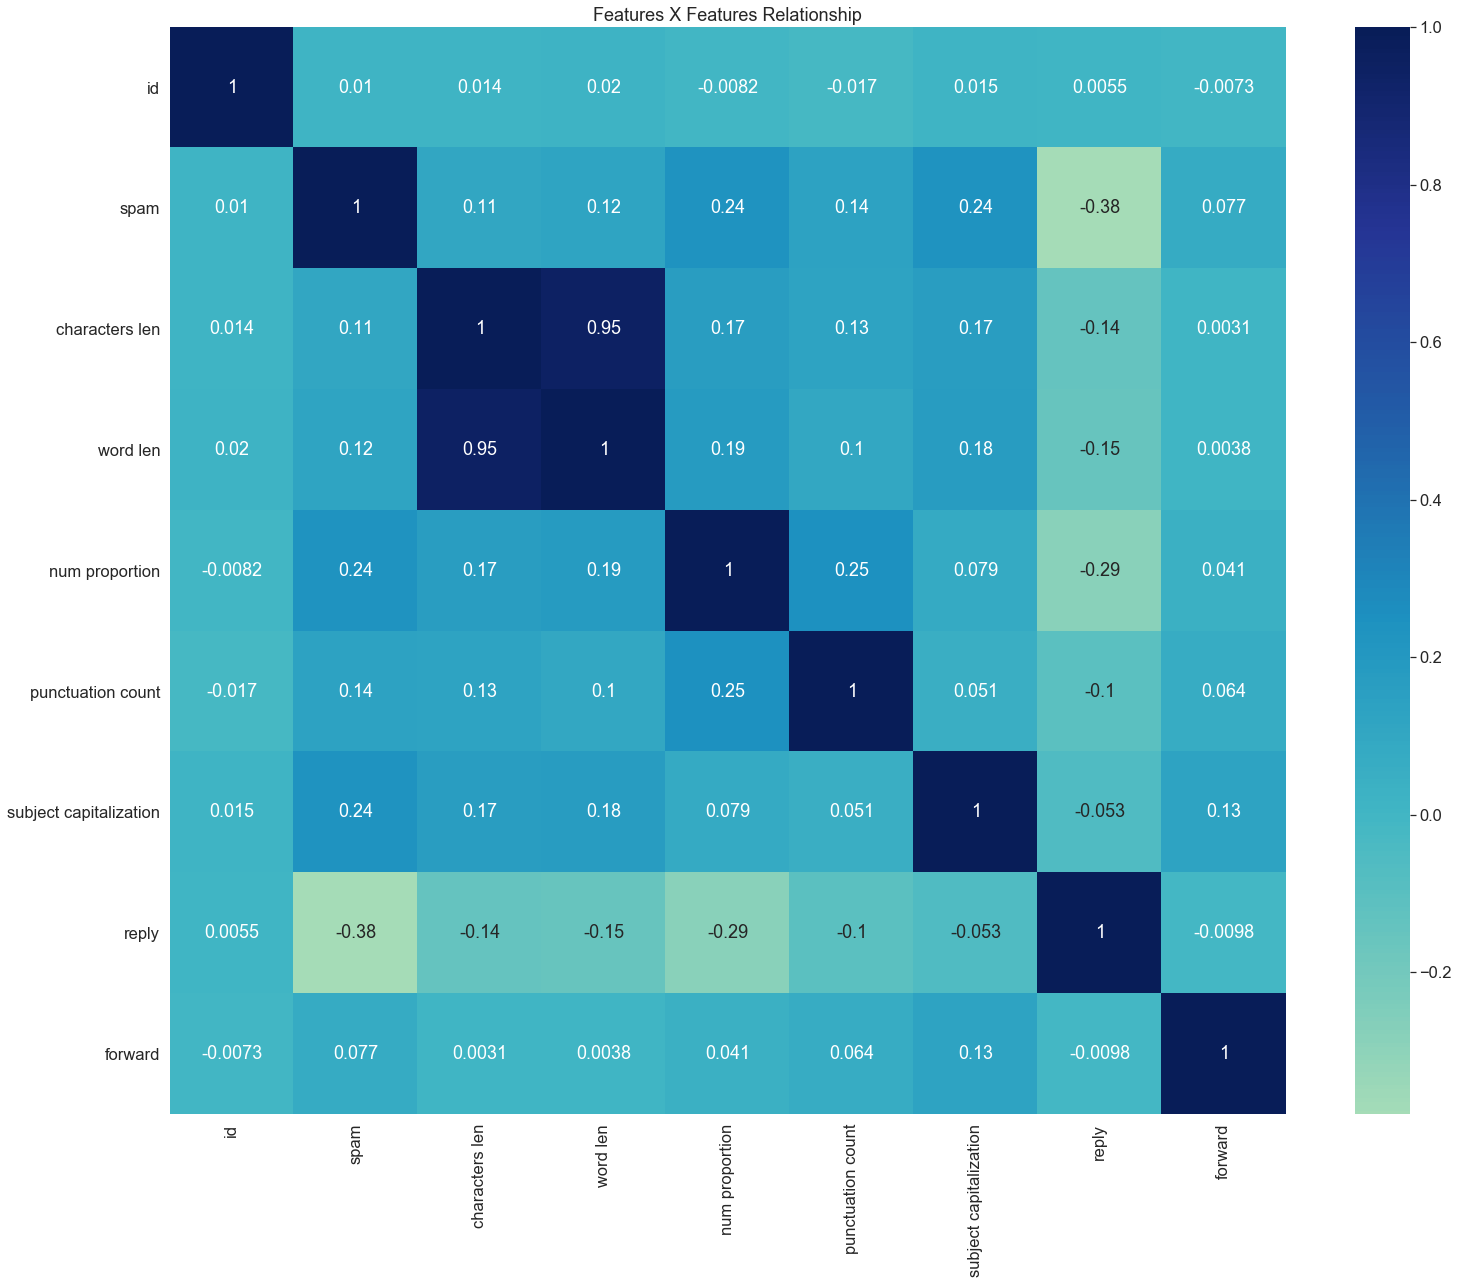

In [20]:
# Write your description (2-3 sentences) as a comment here:
# We look at the correlation between each features in respect to each other.
#One way to inteprerate this and looking at the intersections between the spam/ham and features.
# The darker features indicate the higher correlation(when looking at spam/ham with dif features) 
#with two features. Showing that there is a relationship in indentifying 
#whether an email is spam/ham based on that feature.

# Write the code to generate your visualization here:
import string
import re
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

c_names = ['characters len', 'word len', 'puntuation count', 'subject capitalization', 'reply', 'forward']

def get_words(emails):
    words = []
    for i in emails:
        ws = re.findall(r'[a-zA-Z]+', i) 
        for w in ws:
            words.append(w)
    return words


spam_words = get_words(train[train['spam'] == 1]['email'].values)
ham_words = get_words(train[train['spam'] == 0]['email'].values)
# spam_emails = train[train['spam'] == 1]['email']
# ham_emails = train[train['spam'] == 0]['email']

def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = np.array([[1 if i in y else 0 for i in words ] for y in texts ])
    return indicator_array


        

def add_columns(data):
    data = data.copy()
    data = data.fillna("")
    data.insert(len(data.columns), 'characters len', [len(i) for i in data.fillna("")['email']] )
    data.insert(len(data.columns), 'word len', [len(re.findall(r'[a-zA-Z]+', i)) for i in data.fillna("")['email']] )
    data.insert(len(data.columns), 'num proportion', [len(re.findall(r'[0-9]+', i))/len(i) for i in data.fillna("")['email']] )
    data.insert(len(data.columns), 'punctuation count', [count(i ,set(string.punctuation))/len(i) for i in data.fillna("")['email']] )
    data.insert(len(data.columns), 'subject capitalization', [sum(1 for y in i if y.isupper()) for i in data.fillna("")['subject']] )
    data.insert(len(data.columns), 'reply', [0 if i == False else 1 for i in data.fillna("")['subject'].str.contains("Re:").values])
    data.insert(len(data.columns), 'forward', [0 if i == False else 1 for i in data.fillna("")['subject'].str.contains("Fw:").values])
#     data.insert(len(data.columns), 'contain num', [0 if i == False else 1 for i in data.fillna("")['subject'].str.contains(r"[0-9]+").values])
    return data
train_with_features = add_columns(train)
test_with_features = add_columns(test)

train_with_features, test_with_features
plt.figure(figsize = (25, 20))
plt.title("Features X Features Relationship")
sns.heatmap(train_with_features.corr(), annot = True, center = 0, cmap = "YlGnBu")

# spam_percent = np.average(words_in_texts(spam_words, spam_emails), axis = 0)
# ham_percent = np.average(words_in_texts(ham_words, ham_emails), axis = 0)
# spam_percent, ham_percent 
# chosen_words = [ 'html', 'href',  'inform','click', "=", "<head>", "fill", "offer", 'link', 'increase', '!', '?' ]
some_words = spam_words[:150] + ham_words[:150]  
spwords = []


# # chosen_words = ['body', 'business', 'html', 'money', 'offer', 'please']
# spam_emails = train[train['spam'] == 1]['email']
# ham_emails = train[train['spam'] == 0]['email']
# spam_percent = np.average(words_in_texts(chosen_words, spam_emails), axis = 0)
# ham_percent = np.average(words_in_texts(chosen_words, ham_emails), axis = 0)
# spam_ham = [spam_percent, ham_percent]
# df = pd.DataFrame({
#     'Words': chosen_words,
#     'Ham': ham_percent, 
#     'Spam': spam_percent,
# })
# fig, ax1 = plt.subplots(figsize=(8, 8))
# tidy = df.melt('Words').rename(columns=str.title)
# ax1.set(ylim=(0, 1))
# sns.barplot(x='Words', y='Value', hue='Variable', data=tidy, ax=ax1)
# sns.despine(fig)
# Note: if your plot doesn't appear in the PDF, you should try uncommenting the following line:
# plt.show()

In [21]:
train_with_features

,id,subject,email,spam,characters len,word len,num proportion,punctuation count,subject capitalization,reply,forward
7657,7657,Subject: Patch to enable/disable log\n,"while i was playing with the past issues, it a...",0,1641,212,0.016453,0.145034,2,0,0
6911,6911,Subject: When an engineer flaps his wings\n,url: http://diveintomark.org/archives/2002/10/...,0,4713,722,0.016762,0.087418,2,0,0
6074,6074,Subject: Re: [Razor-users] razor plugins for m...,"no, please post a link!\n \n fox\n ----- origi...",0,1399,180,0.007148,0.238027,3,1,0
4376,4376,Subject: NYTimes.com Article: Stop Those Press...,this article from nytimes.com \n has been sent...,0,4435,712,0.004059,0.042616,12,0,0
5766,5766,Subject: What's facing FBI's new CIO? (Tech Up...,<html>\n <head>\n <title>tech update today</ti...,0,32857,4818,0.028548,0.216453,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,5734,Subject: [Spambayes] understanding high false ...,">>>>> ""tp"" == tim peters <tim.one@comcast.net>...",0,465,64,0.000000,0.120430,2,0,0
5191,5191,Subject: Reach millions on the internet!!\n,"\n dear consumers, increase your business sale...",1,7054,942,0.009923,0.173944,2,0,0
5390,5390,Subject: Facts about sex.\n,\n forwarded-by: flower\n \n did you know that...,0,1732,272,0.006928,0.027136,2,0,0
860,860,Subject: Re: Zoot apt/openssh & new DVD playin...,"on tue, oct 08, 2002 at 04:36:13pm +0200, matt...",0,1098,180,0.011840,0.114754,6,1,0


In [22]:
test_with_features

,id,subject,email,characters len,word len,num proportion,punctuation count,subject capitalization,reply,forward
0,0,Subject: CERT Advisory CA-2002-21 Vulnerabilit...,\n \n -----begin pgp signed message-----\n \n ...,11703,1478,0.009741,0.065624,12,0,0
1,1,Subject: ADV: Affordable Life Insurance ddbfk\n,low-cost term-life insurance!\n save up to 70%...,773,109,0.011643,0.098318,7,0,0
2,2,Subject: CAREER OPPORTUNITY. WORK FROM HOME\n,------=_nextpart_000_00a0_03e30a1a.b1804b54\n ...,1067,134,0.107779,0.024367,30,0,0
3,3,Subject: Marriage makes both sexes happy\n,"url: http://www.newsisfree.com/click/-3,848315...",193,28,0.015544,0.072539,2,0,0
4,4,Subject: Re: [SAtalk] SA very slow (hangs?) on...,on thursday 29 august 2002 16:39 cet mike burg...,921,122,0.007600,0.205212,6,1,0
...,...,...,...,...,...,...,...,...,...,...
995,995,Subject: Re: Alsa/Redhat 8 compatability\n,"once upon a time, brian wrote :\n \n > \n > ...",1516,231,0.016491,0.102902,4,1,0
996,996,Subject: Re: Goodbye Global Warming\n,\n --]> a green once said that if the spotted ...,253,44,0.000000,0.102767,5,1,0
997,997,Subject: Re: Entrepreneurs\n,"on fri, 23 aug 2002, robert harley wrote:\n \n...",620,102,0.003226,0.067742,3,1,0
998,998,Subject: Re: [ILUG] slashdot EW Dijkstra humor\n,jpl suggested:\n > recursion is only truely u...,797,124,0.001255,0.116688,9,1,0


In [23]:
X_train

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

## Classification (with added features)

In [27]:
from sklearn.linear_model import LogisticRegressionCV as lrCV

def email_classifer(train, test, features):
    model = lrCV(Cs = 2, fit_intercept = True, cv = 10, random_state = 42, max_iter = 10000)
    
    def add_words(data, words, texts):
        """
        One-hot-encodes words.  New columns are of the form Fireplace_Qu=QUALITY
        """
        data = data.copy()
        wo = np.array([[1 if i in y else 0 for i in words ] for y in texts ])
        k = []
        w =[]
        for i in np.arange(len(wo[0])):
            k =[]
            for y in np.arange(len(wo)):
                k.append(wo[y][i])
            w.append(k)
        u = 0
        for i in w:
            data.insert(len(data.columns), words[u], w[u])
            u+=1
        return data
    def select_columns(data, columns):
        """Select only columns passed as arguments."""
        return data.loc[:, columns]
    some_words = []
    for i in features:
        if not i in some_words + ['email', 'spam', 'subject', 'id'] :
            some_words.append(i)
    
    train = add_words(train, some_words, train['email'])
    train =  select_columns(train, [ 'spam', 'id' ] + some_words).fillna(0)
    test = add_words(test, some_words, test['email'])
    test = select_columns(test, [ 'id'] + some_words).fillna(0)
    X_train = train.drop(columns=['spam'])
    Y_train = train.loc[:, 'spam']
    model.fit(X_train ,Y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(test)
    model_score = model.score(X_train, Y_train)
    return train_predictions, test_predictions, test, model_score
    
    
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))


features = ['a', 'cash', '!', 'but', 'offer', 'http', 'content-transfer-encoding:', 
              'link', 'url','please', 'com', 'size', 'available', 'come', 
              'align="center">', 'and', 'the','how', 'to', 'where', 
              'account', 'gift', 'for','you', 'their','font','thx', 
              'this' 'I', '\n', '@', ':', '==', '-', '/', 'html', "'", "***", '###', 
              "</head>",'href', '<', ">", "<body>"] + spam_words[:150] + ham_words[:150] 


train_predict, test_predictions, test, train_score = email_classifer(
    train_with_features, test_with_features, features)


training_rmse = rmse(train_predict, Y_train)


print("The training accuracy score is: " + str(train_score))
print("The training rsme is: " + str(training_rmse))
train_predict,

The training accuracy score is: 0.9703181152668707
The training rsme is: 0.17228431365951238


(array([0, 0, 0, ..., 1, 0, 0]),)

In [28]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-08-17T19:07:30.csv.
You may now upload this CSV file to Kaggle for scoring.
